# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as mn

# Load Data

In [2]:
breed_stats = pd.read_csv('./datasets/breeds_info_clean.csv')

In [3]:
breed_stats.head(3)

,breed,classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,border collie,brightest dogs,0.95,1.0,4.0,19.000000,21.000000,40.000000,40.000000
1,poodle,brightest dogs,0.95,1.0,4.0,17.941176,20.908497,42.934641,57.522876
2,german shepherd,brightest dogs,0.95,1.0,4.0,22.000000,26.000000,75.000000,90.000000


List of all breeds

In [4]:
breeds = set(breed_stats['breed'])

In [5]:
shelter = pd.read_csv('./datasets/cleaned_data/texas_shelters_active.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,8,10,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
shelter.head(3)

,id,breed,color,dob,sex,date_in,age_in,intact_in,location,intake_type,...,date_out,age_out,intact_out,outcome,age,primary_color,secondary_color,breed_1,breed_2,pure
0,A047759,dachshund,Tricolor,1.080864e+09,1.0,1.396454e+09,10.0,0.0,Austin (TX),surrender,...,1.396884e+09,10.0,0.0,transfer,Senior,tricolor,tricolor,dachshund,dachshund,1.0
1,A134067,shetland sheepdog,Brown/White,8.769600e+08,1.0,1.384593e+09,16.0,0.0,12034 Research Blvd in Austin (TX),public_assist,...,1.384603e+09,16.0,0.0,owner_return,Senior,brown,white,shetland sheepdog,shetland sheepdog,1.0
2,A141142,labrador retriever/pit bull,Black/White,8.966592e+08,0.0,1.384613e+09,15.0,0.0,Austin (TX),stray,...,1.384688e+09,15.0,0.0,owner_return,Senior,black,white,labrador retriever,pit bull,NaN


In [7]:
shelter.columns

Index(['id', 'breed', 'color', 'dob', 'sex', 'date_in', 'age_in', 'intact_in',
       'location', 'intake_type', 'intake_subtype', 'condition', 'date_out',
       'age_out', 'intact_out', 'outcome', 'age', 'primary_color',
       'secondary_color', 'breed_1', 'breed_2', 'pure'],
      dtype='object')

In [8]:
shelter.drop(columns=['id', 'color', 'dob', 'age_in', 'intact_in', 'location', 'intake_subtype'])

,breed,sex,date_in,intake_type,condition,date_out,age_out,intact_out,outcome,age,primary_color,secondary_color,breed_1,breed_2,pure
0,dachshund,1.0,1.396454e+09,surrender,wnl,1.396884e+09,10.0,0.0,transfer,Senior,tricolor,tricolor,dachshund,dachshund,1.0
1,shetland sheepdog,1.0,1.384593e+09,public_assist,med_attn,1.384603e+09,16.0,0.0,owner_return,Senior,brown,white,shetland sheepdog,shetland sheepdog,1.0
2,labrador retriever/pit bull,0.0,1.384613e+09,stray,aged,1.384688e+09,15.0,0.0,owner_return,Senior,black,white,labrador retriever,pit bull,NaN
3,miniature schnauzer,0.0,1.415978e+09,stray,wnl,1.415993e+09,15.0,1.0,owner_return,Senior,black,gray,miniature schnauzer,miniature schnauzer,1.0
4,lhasa apso,1.0,1.410780e+09,stray,wnl,1.410799e+09,15.0,0.0,owner_return,Senior,brown,white,lhasa apso,lhasa apso,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132613,chihuahua,NaN,1.576541e+09,stray,other,1.576541e+09,NaN,NaN,owner_return,Adult,NaN,NaN,chihuahua,chihuahua,1.0
132614,chihuahua,NaN,1.576541e+09,stray,wnl,1.576541e+09,NaN,NaN,owner_return,Adult,NaN,NaN,chihuahua,chihuahua,1.0
132615,french bulldog,NaN,1.576541e+09,stray,other,1.576541e+09,NaN,NaN,owner_return,Adult,NaN,NaN,french bulldog,french bulldog,1.0
132616,bulldog,NaN,1.576541e+09,stray,wnl,1.576541e+09,NaN,NaN,owner_return,Adult,NaN,NaN,bulldog,bulldog,1.0


In [9]:
shelter['pure'].fillna(0, inplace=True)

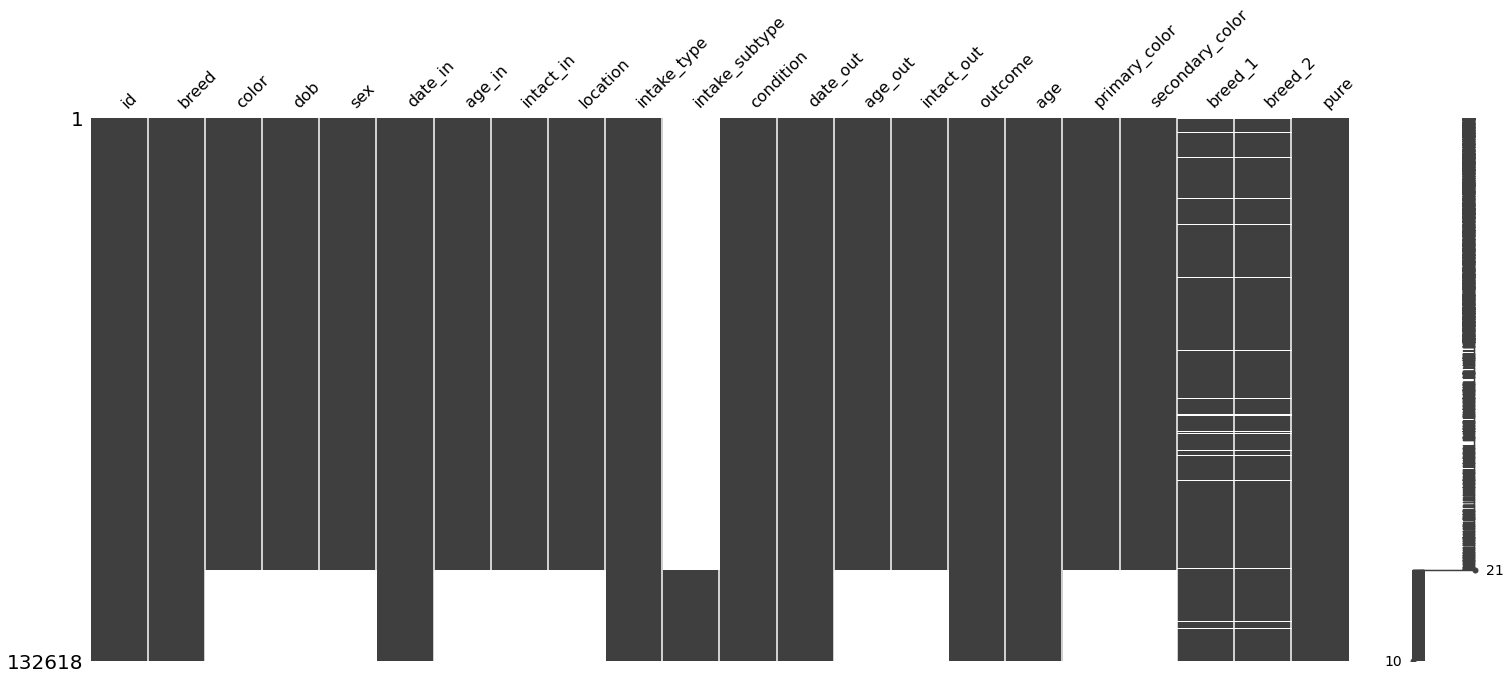

In [10]:
mn.matrix(shelter);

<AxesSubplot:>

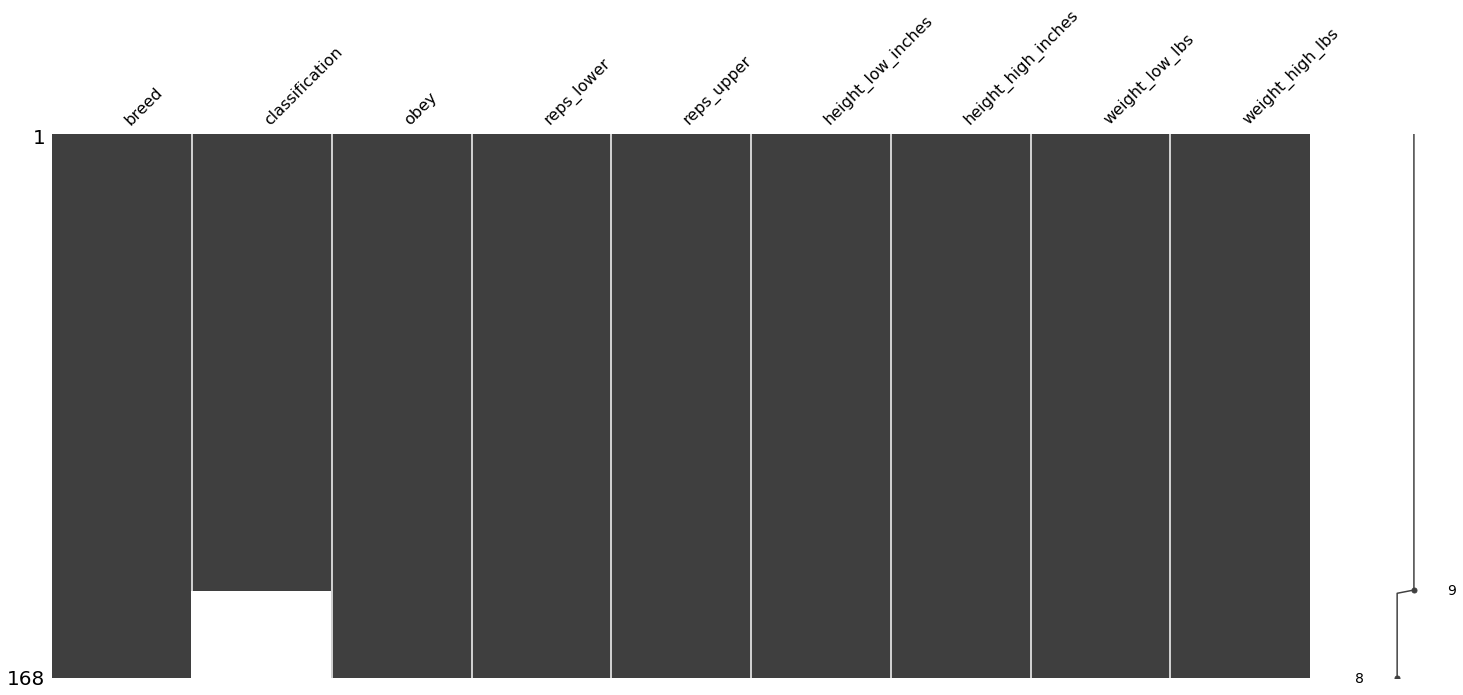

In [11]:
mn.matrix(breed_stats)

## Compile Breed stats into shelter data

Average stats to fill unknowns

In [12]:
mix = []                                                                        # storage
for c in breed_stats.drop(columns=['breed', 'classification']).columns:
    mix.append(breed_stats[c].mean())                                           # get mean stat
mix = zip(breed_stats.drop(columns=['breed', 'classification']).columns, mix)   # convert to df
mix = pd.DataFrame(mix).T
mix.columns = mix.iloc[0]                                                       # rename cols
mix = mix[1:].copy()                                                            # drop row containing column names
mix = mix.add_suffix('_b2')                                                     # add col name suffix
mix                                                                             # inspect

,obey_b2,reps_lower_b2,reps_upper_b2,height_low_inches_b2,height_high_inches_b2,weight_low_lbs_b2,weight_high_lbs_b2
1,0.569858,25.319149,41.028369,17.941176,20.908497,42.934641,57.522876


In [13]:
mix.squeeze()

0
obey_b2                   0.569858
reps_lower_b2            25.319149
reps_upper_b2            41.028369
height_low_inches_b2     17.941176
height_high_inches_b2    20.908497
weight_low_lbs_b2        42.934641
weight_high_lbs_b2       57.522876
Name: 1, dtype: object

In [14]:
shelter = shelter[shelter['breed_1'].notna()].copy(deep=True)       # drop dogs without a breed classification

In [15]:
def gen_breed_stats(x):
    
    d1 = breed_stats.drop(columns='classification').set_index('breed').loc[x['breed_1'],:]
    d1['breed_class'] = x['breed_1']
    
    if x['breed_2'] != 'mix':
        d2 = breed_stats.drop(columns='classification').set_index('breed').loc[x['breed_2'],:]
        d2['breed_class'] = x['breed_2']
    else:
        d2 = mix.squeeze()

    d1 = d1.add_suffix('_b1')   # data frame of breed_1
    d2 = d2.add_suffix('_b2')   # data frame of breed_2

    out = pd.concat([d1, d2])   # this line not working

    return out

In [16]:
# takes about 10 mins to run
comp_1 = shelter.apply(gen_breed_stats, axis=1)

In [17]:
comp_1.head(5)

,breed_class_b1,breed_class_b2,height_high_inches_b1,height_high_inches_b2,height_high_inches_b2_b2,height_low_inches_b1,height_low_inches_b2,height_low_inches_b2_b2,obey_b1,obey_b2,...,reps_lower_b2_b2,reps_upper_b1,reps_upper_b2,reps_upper_b2_b2,weight_high_lbs_b1,weight_high_lbs_b2,weight_high_lbs_b2_b2,weight_low_lbs_b1,weight_low_lbs_b2,weight_low_lbs_b2_b2
0,dachshund,dachshund,10.000000,10.000000,NaN,7.000000,7.000000,NaN,0.50,0.50,...,NaN,40.0,40.0,NaN,32.000000,32.000000,NaN,16.000000,16.000000,NaN
1,shetland sheepdog,shetland sheepdog,20.908497,20.908497,NaN,17.941176,17.941176,NaN,0.95,0.95,...,NaN,4.0,4.0,NaN,57.522876,57.522876,NaN,42.934641,42.934641,NaN
2,labrador retriever,pit bull,24.000000,19.000000,NaN,21.000000,17.000000,NaN,0.95,0.70,...,NaN,4.0,25.0,NaN,80.000000,50.000000,NaN,55.000000,40.000000,NaN
3,miniature schnauzer,miniature schnauzer,20.908497,20.908497,NaN,17.941176,17.941176,NaN,0.85,0.85,...,NaN,15.0,15.0,NaN,57.522876,57.522876,NaN,42.934641,42.934641,NaN
4,lhasa apso,lhasa apso,20.908497,20.908497,NaN,17.941176,17.941176,NaN,0.30,0.30,...,NaN,80.0,80.0,NaN,57.522876,57.522876,NaN,42.934641,42.934641,NaN


In [18]:
# averages stats between two breeds
def avg_breed_stats(df):
    # create empty dataframe
    new_df = pd.DataFrame()

    new_df['obey'] = (df['obey_b1'] + df['obey_b2']) / 2
    new_df['reps_lower'] = (df['reps_lower_b1'] + df['reps_lower_b2']) / 2
    new_df['reps_upper'] = (df['reps_upper_b1'] + df['reps_upper_b2']) / 2
    new_df['height_low_inches'] = (df['height_low_inches_b1'] + df['height_low_inches_b2']) / 2
    new_df['height_high_inches'] = (df['height_high_inches_b1'] + df['height_high_inches_b2']) / 2
    new_df['weight_low_lbs'] = (df['weight_low_lbs_b1'] + df['weight_low_lbs_b2']) / 2
    new_df['weight_high_lbs'] = (df['weight_high_lbs_b1'] + df['weight_high_lbs_b2']) / 2

    # returns averaged stats between the two breeds
    return new_df
    
all_stats = avg_breed_stats(comp_1)

In [19]:
all_stats.head()

,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000
1,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876
2,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000
3,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876
4,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876


In [20]:
all_stats.isna().sum()

obey                  1913
reps_lower            1913
reps_upper            1913
height_low_inches     1913
height_high_inches    1913
weight_low_lbs        1913
weight_high_lbs       1913
dtype: int64

In [21]:
all_stats[all_stats['obey'].isna()]

,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
109290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110093,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# combines shelter dataframe and the stats for those dogs
shelter_with_stats = pd.concat([shelter, all_stats], axis=1)
shelter_with_stats.head(2)

,id,breed,color,dob,sex,date_in,age_in,intact_in,location,intake_type,...,breed_1,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,A047759,dachshund,Tricolor,1.080864e+09,1.0,1.396454e+09,10.0,0.0,Austin (TX),surrender,...,dachshund,dachshund,1.0,0.50,26.0,40.0,7.000000,10.000000,16.000000,32.000000
1,A134067,shetland sheepdog,Brown/White,8.769600e+08,1.0,1.384593e+09,16.0,0.0,12034 Research Blvd in Austin (TX),public_assist,...,shetland sheepdog,shetland sheepdog,1.0,0.95,1.0,4.0,17.941176,20.908497,42.934641,57.522876


In [28]:
shelter_with_stats.columns

Index(['id', 'breed', 'color', 'dob', 'sex', 'date_in', 'age_in', 'intact_in',
       'location', 'intake_type', 'intake_subtype', 'condition', 'date_out',
       'age_out', 'intact_out', 'outcome', 'age', 'primary_color',
       'secondary_color', 'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower',
       'reps_upper', 'height_low_inches', 'height_high_inches',
       'weight_low_lbs', 'weight_high_lbs'],
      dtype='object')

In [60]:
# create a new column for the time each dog was in the shelter
shelter_with_stats['time_in_shelter'] = abs(shelter_with_stats['date_out'] - shelter_with_stats['date_in'])

,id,breed,color,dob,sex,date_in,age_in,intact_in,location,intake_type,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,A047759,dachshund,Tricolor,1.080864e+09,1.0,1.396454e+09,10.0,0.0,Austin (TX),surrender,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,429420.0
1,A134067,shetland sheepdog,Brown/White,8.769600e+08,1.0,1.384593e+09,16.0,0.0,12034 Research Blvd in Austin (TX),public_assist,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,10320.0
2,A141142,labrador retriever/pit bull,Black/White,8.966592e+08,0.0,1.384613e+09,15.0,0.0,Austin (TX),stray,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,75240.0
3,A163459,miniature schnauzer,Black/Gray,9.402912e+08,0.0,1.415978e+09,15.0,1.0,Ih 35 And 41St St in Austin (TX),stray,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,15420.0
4,A165752,lhasa apso,Brown/White,9.349344e+08,1.0,1.410780e+09,15.0,0.0,Gatlin Gun Rd And Brodie in Austin (TX),stray,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,18420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110450,A850544,basenji,Tricolor,1.624666e+09,1.0,1.643212e+09,1.0,1.0,11901 Geode Drive in Austin (TX),stray,...,basenji,1.0,0.100,81.0,100.0,17.000000,17.000000,20.000000,22.000000,1122360.0
110452,A850544,basenji,Tricolor,1.624666e+09,1.0,1.644230e+09,1.0,0.0,Austin (TX),surrender,...,basenji,1.0,0.100,81.0,100.0,17.000000,17.000000,20.000000,22.000000,104460.0
110453,A850561,german shepherd,Black/Brown,1.579997e+09,1.0,1.643218e+09,2.0,0.0,Austin (TX),public_assist,...,german shepherd,1.0,0.950,1.0,4.0,22.000000,26.000000,75.000000,90.000000,88440.0
110454,A850561,german shepherd,Black/Brown,1.579997e+09,1.0,1.643218e+09,2.0,0.0,Austin (TX),public_assist,...,german shepherd,1.0,0.950,1.0,4.0,22.000000,26.000000,75.000000,90.000000,859860.0


<AxesSubplot:>

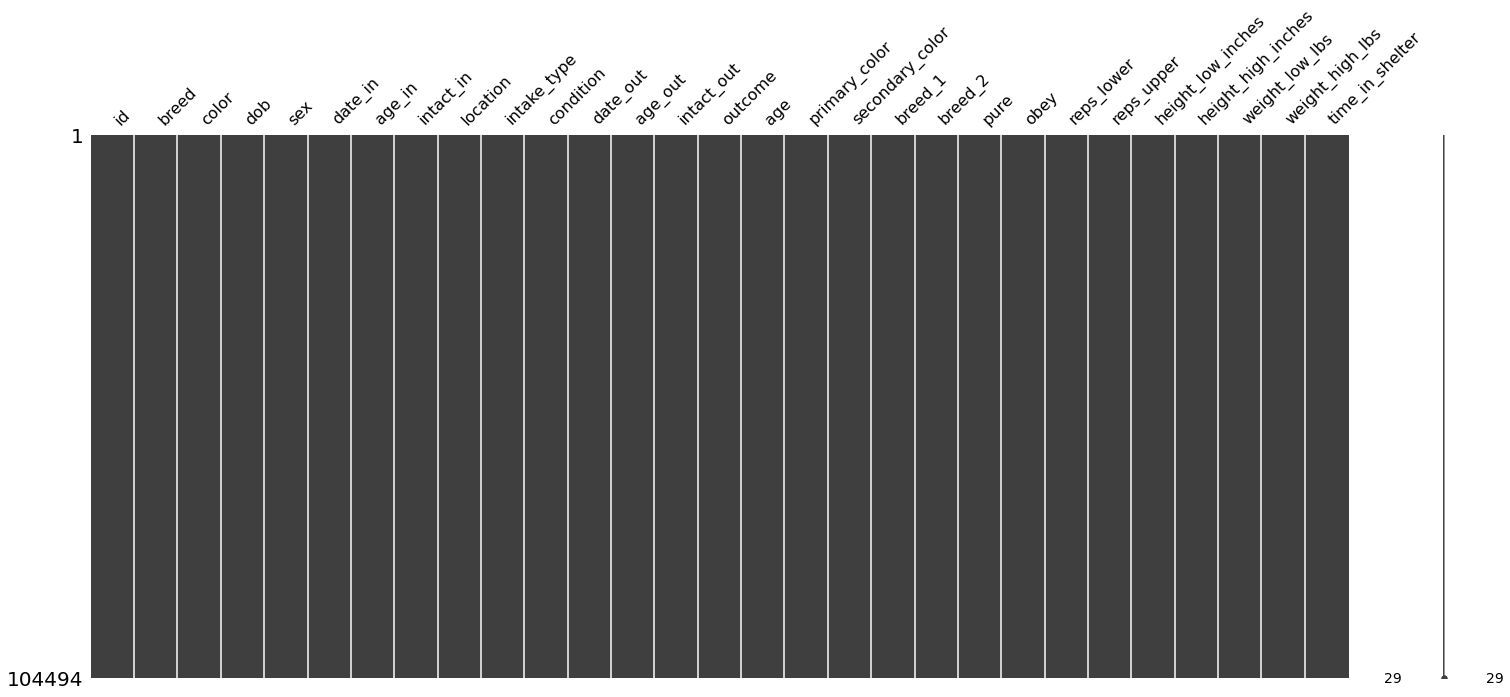

In [49]:
mn.matrix(shelter_with_stats)

In [50]:
# drop intake_subtype column. Too many missing values. The values present were from the dallas dataset
shelter_with_stats.drop(columns='intake_subtype', inplace=True)

# drops all missing values. Mainly the dallas dataset
shelter_with_stats.dropna(inplace=True)

KeyError: "['intake_subtype'] not found in axis"

In [61]:
shelter_with_stats.to_csv('./datasets/cleaned_data/shelters_with_stats.csv', index=False)